In [23]:
import numpy as np
from video_import import *
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from skimage.filters.thresholding import threshold_li, threshold_otsu
from skimage.filters import unsharp_mask, rank
from skimage.segmentation import mark_boundaries, chan_vese, slic, watershed
from skimage.color import label2rgb
from skimage.feature import peak_local_max
from skimage.graph import rag_mean_color, cut_normalized, merge_hierarchical
from skimage.exposure import adjust_gamma, adjust_log, equalize_hist, equalize_adapthist
import cv2 
import os

In [ ]:
folder_path = '/Users/juanliyau/Downloads/Process-0830/'
files = os.listdir(folder_path)

In [13]:
for i in range(len(files)):
    data_tmp = imageio.imread(folder_path + files[i]) 
    data_tmp = np.array(data_tmp)

    if i==0:
        data = np.empty((data_tmp.shape[0], data_tmp.shape[1], len(files)))
    
    data[:,:,i] = data_tmp

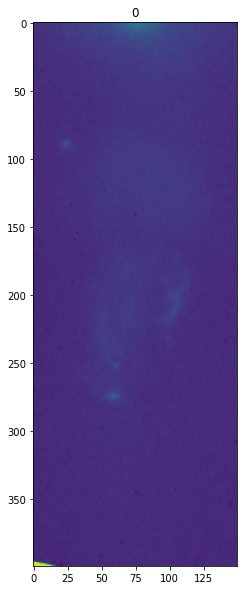

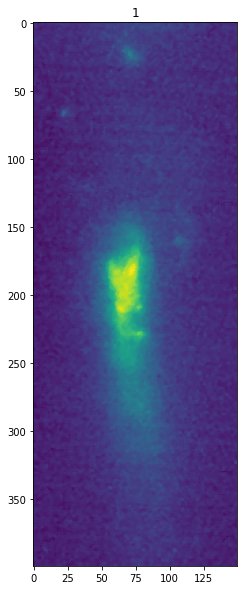

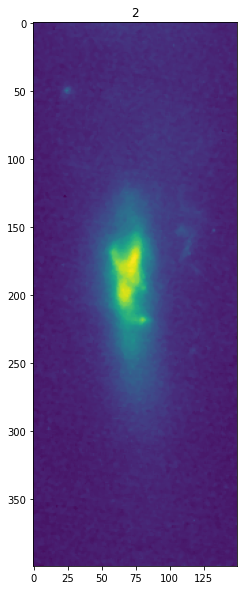

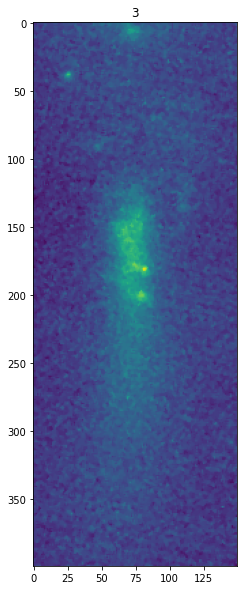

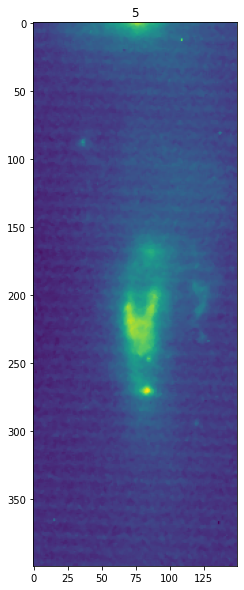

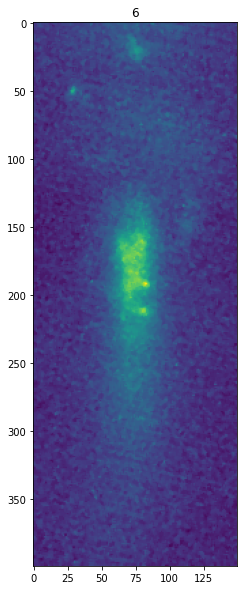

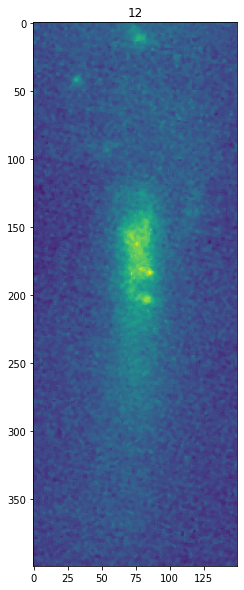

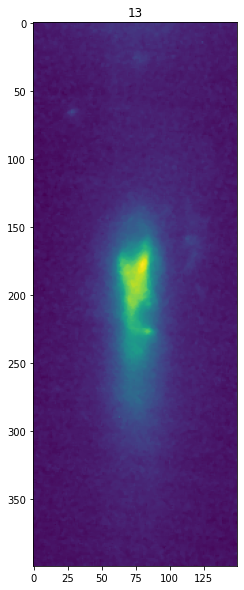

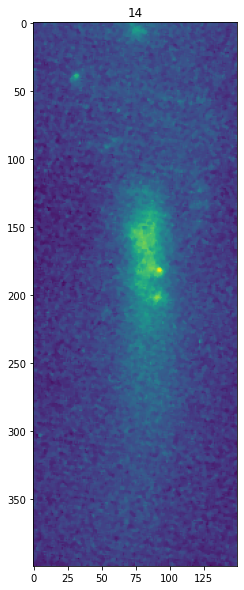

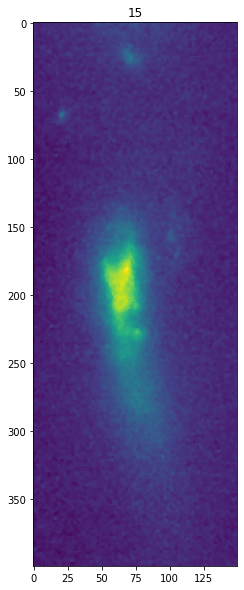

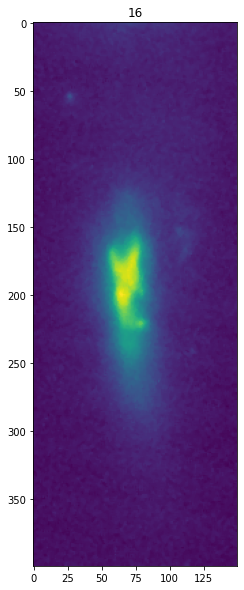

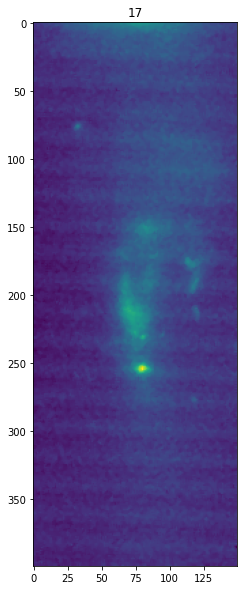

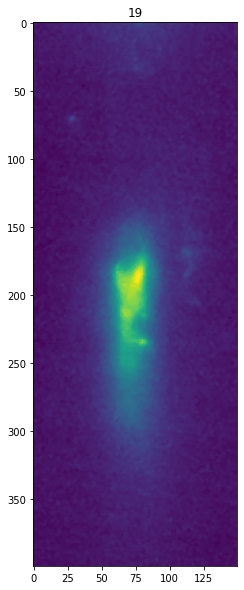

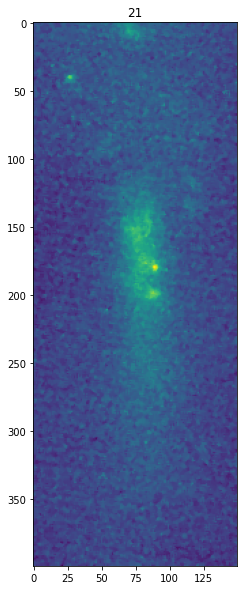

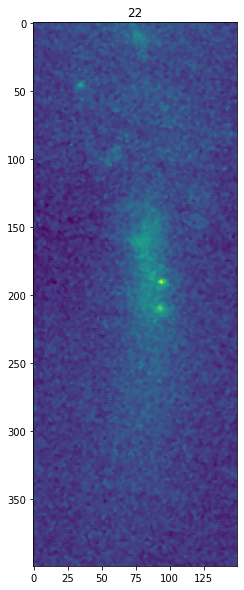

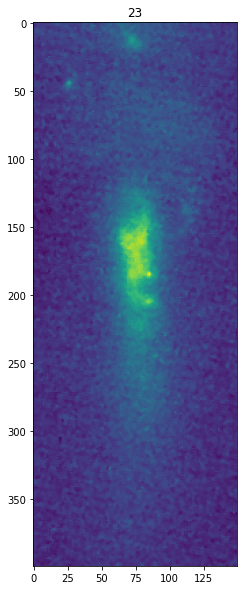

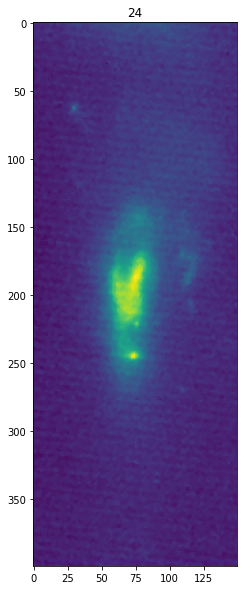

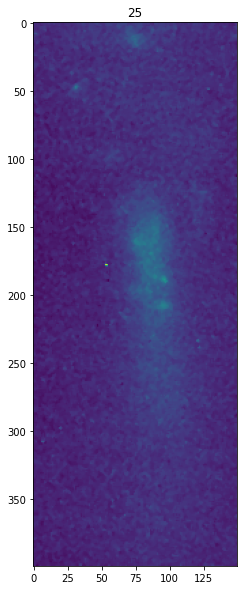

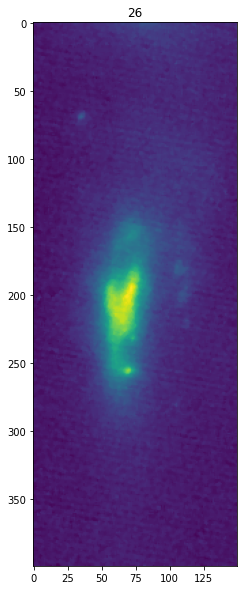

In [89]:
for i in range(data.shape[2]):
    plt.figure(figsize=(10,10))
    #plt.imshow(data[100:,:,i])
    plt.imshow(data[100:,:,i])
    plt.title(f"{i}")
    plt.show()

In [ ]:
file1 = data[:,:,22]

In [91]:
plt.imshow(file1)

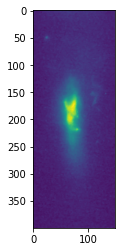

In [92]:
file1 = file1[100:,:]
plt.imshow(file1)

In [93]:
sigma = 3
frame_smooth = ndi.gaussian_filter(file1, sigma)

In [94]:
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(file1)
ax[0].set_title("Original")
ax[1].imshow(frame_smooth)
ax[1].set_title("Blurred")
plt.show()

In [95]:
normalized_image = cv2.normalize(frame_smooth, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

In [96]:
contrasted_image_gamma = adjust_gamma(normalized_image, 1)
contrasted_image_log = adjust_log(normalized_image, 1)
contrasted_image_hist = equalize_hist(normalized_image)
contrasted_image_adhist = equalize_adapthist(normalized_image)

In [97]:
fig, ax = plt.subplots(2,3, figsize=(10,10))
ax[0,0].imshow(normalized_image, cmap="viridis", interpolation = "nearest")
ax[0,0].set_title("Blurred frame")
ax[0,1].imshow(contrasted_image_gamma, cmap = "viridis", interpolation = "nearest")
ax[0,1].set_title("Contrasted (Power Law Transform)")
ax[0,2].imshow(contrasted_image_log, cmap = "viridis", interpolation = "nearest")
ax[0,2].set_title("Contrasted (Log Transform)")
ax[1,0].imshow(contrasted_image_hist, cmap = "viridis", interpolation = "nearest")
ax[1,0].set_title("Contrasted (Histogram Equalization)")
ax[1,1].imshow(contrasted_image_adhist, cmap = "viridis", interpolation = "nearest")
ax[1,1].set_title("Contrasted (Adaptive Histogram Equalization)")
ax[1, 2].axis('off')
plt.tight_layout()
plt.show()

In [98]:
threshold_value_otsu = threshold_otsu(contrasted_image_log)
threshold_value_li = threshold_li(contrasted_image_log)
binary_image_otsu = contrasted_image_log > threshold_value_otsu
binary_image_li = contrasted_image_log > threshold_value_li

In [99]:
fig,ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(normalized_image)
ax[0].set_title("Blurred Frame")
ax[1].imshow(binary_image_otsu)
ax[1].set_title("Thresholded Frame (Otsu)")
ax[2].imshow(binary_image_li)
ax[2].set_title("Thresholded Frame (Li)")
plt.show()